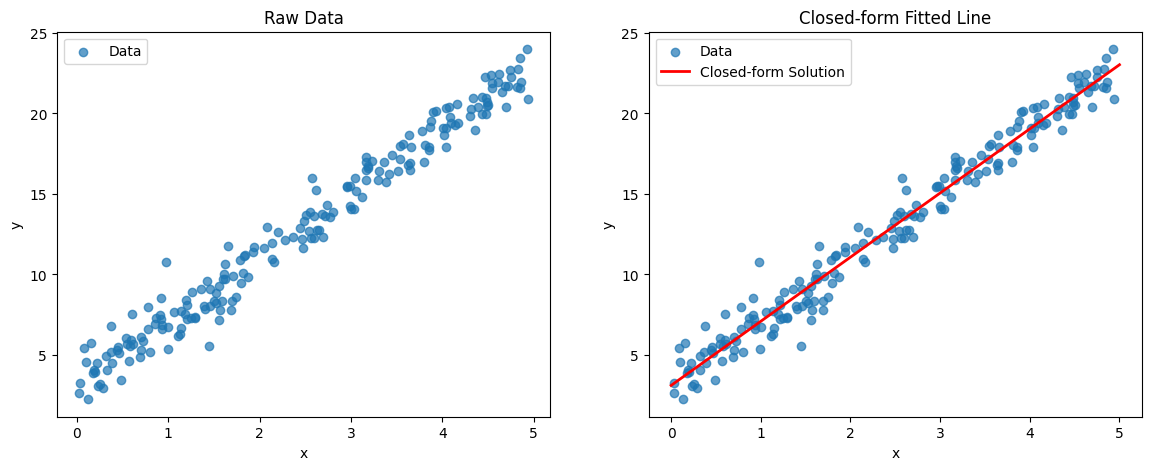

Closed-form solution:
  Intercept: 3.1052, Slope: 3.9844


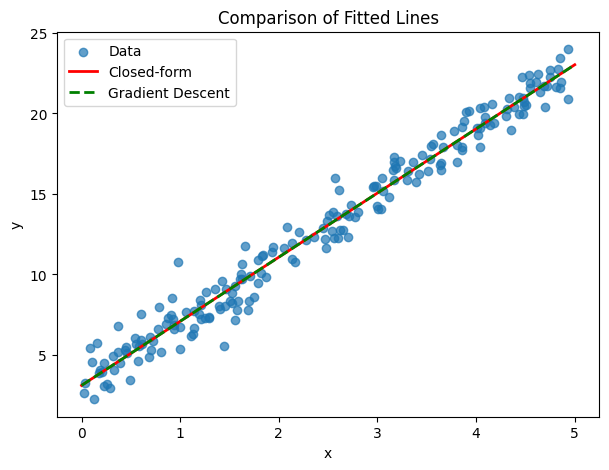

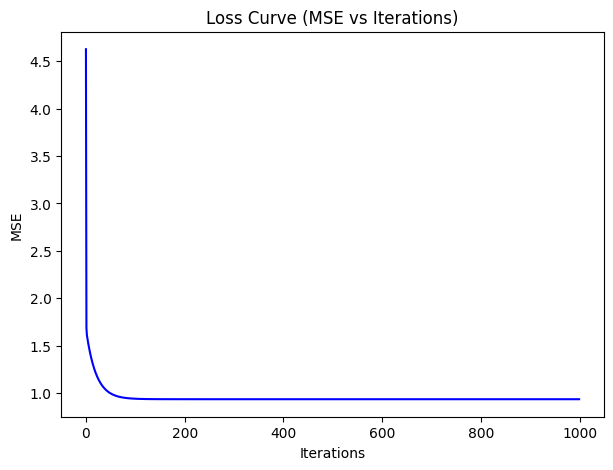

Gradient Descent solution:
  Intercept: 3.1052, Slope: 3.9844

Comparison:
  Closed-form -> Intercept: 3.1052, Slope: 3.9844
  Gradient Descent -> Intercept: 3.1052, Slope: 3.9844

Comment: Gradient Descent converged very close to the Closed-form solution. Small differences are due to the finite number of iterations and step size, but both methods recover the true underlying parameters (~3 for intercept and ~4 for slope).


In [2]:
"""
Name: Manikanth Reddy Devarapalli

Student ID: 700765523

CRN: 11595


7 —Programming Problem - Implement Gradient Descent for Linear Regression

Problem Statement

You are asked to implement linear regression using Gradient Descent from scratch (without using scikit-learn’s LinearRegression). Your task is to compare the closed-form solution (Normal Equation) with Gradient Descent on the same dataset.

Dataset

•	Generate synthetic data following: y=3+4x+ϵ where ϵ is Gaussian noise.

•	Create 200 samples with x∈[0,5].

Requirements

1.	Generate the dataset and plot the raw data.

2.	Closed-form solution (Normal Equation):

    o	Compute

    o	Print the estimated intercept and slope.

    o	Plot the fitted line.

3.	Gradient Descent implementation:

    o	Initialize θ=[0,0].

    o	Use learning rate η=0.05.

    o	Run for 1000 iterations.

    o	Plot the loss curve (MSE vs iterations).

    o	Print the final intercept and slope.

4.	Comparison:

    o	Report both solutions (Closed-form vs Gradient Descent).

    o	Comment: Did Gradient Descent converge to the same solution as the closed form?

Expected Deliverables

•	Python code file (.py or Jupyter notebook).

•	A plot showing:

    o	Raw data points.

    o	Closed-form fitted line.

    o	Gradient Descent fitted line.

•	A plot of loss vs iterations (for Gradient Descent).

•	A short explanation (2–3 sentences) of the results.

Hints

•	Don’t forget to add a bias column of 1’s to your X.

•	The gradient for MSE is:

•	Use np.dot() for matrix multiplication.

•	To plot multiple lines on the same figure, use plt.plot() several times.
"""


# Linear Regression using Closed-Form Solution and Gradient Descent
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# 1. Generate synthetic dataset
# -------------------------------
np.random.seed(42)  # for reproducibility

N = 200
X = np.random.uniform(0, 5, N)         # x ∈ [0,5]
epsilon = np.random.normal(0, 1, N)    # Gaussian noise
y = 3 + 4*X + epsilon                  # true relation with noise

# Reshape X and add bias column (for intercept)
X_b = np.c_[np.ones((N, 1)), X]  # shape: (200, 2)

# Plot raw data
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.scatter(X, y, alpha=0.7, label="Data")
plt.title("Raw Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# -------------------------------
# 2. Closed-form (Normal Equation)
# -------------------------------
theta_closed = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
intercept_closed, slope_closed = theta_closed

# Fitted line (Closed form)
x_line = np.linspace(0, 5, 100)
y_line_closed = intercept_closed + slope_closed * x_line

plt.subplot(1, 2, 2)
plt.scatter(X, y, alpha=0.7, label="Data")
plt.plot(x_line, y_line_closed, "r-", linewidth=2, label="Closed-form Solution")
plt.title("Closed-form Fitted Line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

print("Closed-form solution:")
print(f"  Intercept: {intercept_closed:.4f}, Slope: {slope_closed:.4f}")

# -------------------------------
# 3. Gradient Descent
# -------------------------------
eta = 0.05      # learning rate
n_iter = 1000   # iterations
theta = np.zeros(2)  # initial [intercept, slope]
m = len(y)

losses = []

for iteration in range(n_iter):
    gradients = -2/m * X_b.T.dot(y - X_b.dot(theta))  # gradient of MSE
    theta = theta - eta * gradients                   # update step
    mse = np.mean((y - X_b.dot(theta))**2)            # compute MSE
    losses.append(mse)

intercept_gd, slope_gd = theta

# Fitted line (Gradient Descent)
y_line_gd = intercept_gd + slope_gd * x_line

# Plot data with both fitted lines
plt.figure(figsize=(7, 5))
plt.scatter(X, y, alpha=0.7, label="Data")
plt.plot(x_line, y_line_closed, "r-", linewidth=2, label="Closed-form")
plt.plot(x_line, y_line_gd, "g--", linewidth=2, label="Gradient Descent")
plt.title("Comparison of Fitted Lines")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Plot loss curve
plt.figure(figsize=(7, 5))
plt.plot(range(n_iter), losses, "b-")
plt.title("Loss Curve (MSE vs Iterations)")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

print("Gradient Descent solution:")
print(f"  Intercept: {intercept_gd:.4f}, Slope: {slope_gd:.4f}")

# -------------------------------
# 4. Comparison and Comment
# -------------------------------
print("\nComparison:")
print(f"  Closed-form -> Intercept: {intercept_closed:.4f}, Slope: {slope_closed:.4f}")
print(f"  Gradient Descent -> Intercept: {intercept_gd:.4f}, Slope: {slope_gd:.4f}")

print("\nComment: Gradient Descent converged very close to the Closed-form solution. "
      "Small differences are due to the finite number of iterations and step size, "
      "but both methods recover the true underlying parameters (~3 for intercept and ~4 for slope).")
